In [23]:
def draw_add(path, model_num):
    import csv
    import matplotlib.pyplot as plt
    
    color_table = ['orange','black','blue','red','teal','darkred','slateblue','forestgreen','skyblue','hotpink']
    path_list = []
    f = []
    data = []
    abcd = [27, 29]
    
    for item in model_num:
        path_list.append(path + " (" + str(item) + ").csv")
        f.append('')
        data.append('')
        
    for i in range(len(model_num)):
        f[i] = open(path_list[i], 'r', encoding = 'cp949')
        data[i] = csv.reader(f[i], delimiter = ',')
        header = next(data[i])

    step = []
    value = []
    start = True
    
    for csv in data:
        step_buf = []
        value_buf = []
        if start == False:
            step_buf.extend(step[0][0:3])
            value_buf.extend(value[0][0:3])
        buf1 = []
        buf2 = []
        count = 0
        for row in csv:
            if start:
                if count < 23:
                    count += 1
                    continue
                step_buf.append( int( int(row[0].replace(',',''))) )
                value_buf.append( float(row[2].replace(',','')) )
            else:
                buf1.append( 26 + int( int(row[0].replace(',',''))) )
                buf2.append( float(row[2].replace(',','')) )
        if start:
            start = False
            step.append(step_buf)
            value.append(value_buf)
        else:
            step_buf.extend(buf1)
            value_buf.extend(buf2)
            step.append(step_buf)
            value.append(value_buf)
            
    y_label = str()
    if 'eval' in path :
        if 'loss' in path:
            title = 'eval_loss'
            y_label = 'loss'
        else:
            title = 'eval_cer'
            y_label = 'cer'
    else:
        if 'loss' in path:
            title = 'tain_epoch_loss'
            y_label = 'loss'
        else:
            title = 'train_epoch_cer'
            y_label = 'cer'
    plt.figure( figsize = (20,7) )
    plt.suptitle(title,fontsize=20, x = 0.16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.xlabel('epoch', fontsize = 12)
    plt.ylabel(y_label, fontsize = 12)
    for i in range(len(model_num)):
        if i == 0 :
            plt.plot(step[i], value[i], 
                     label = 'Kai #' + str(abcd[i]),
                     color = color_table[len(color_table) - len(model_num) + i]
                     )
        else:
            plt.plot(step[i], value[i], 
                    'r--',
                     label = 'Kai #' + str(abcd[i]),
                     color = color_table[len(color_table) - len(model_num) + i])
    plt.legend()
    plt.grid(True)
    plt.savefig(path + '.png')
    plt.show()
    for i in range(len(model_num)):
        f[i].close()

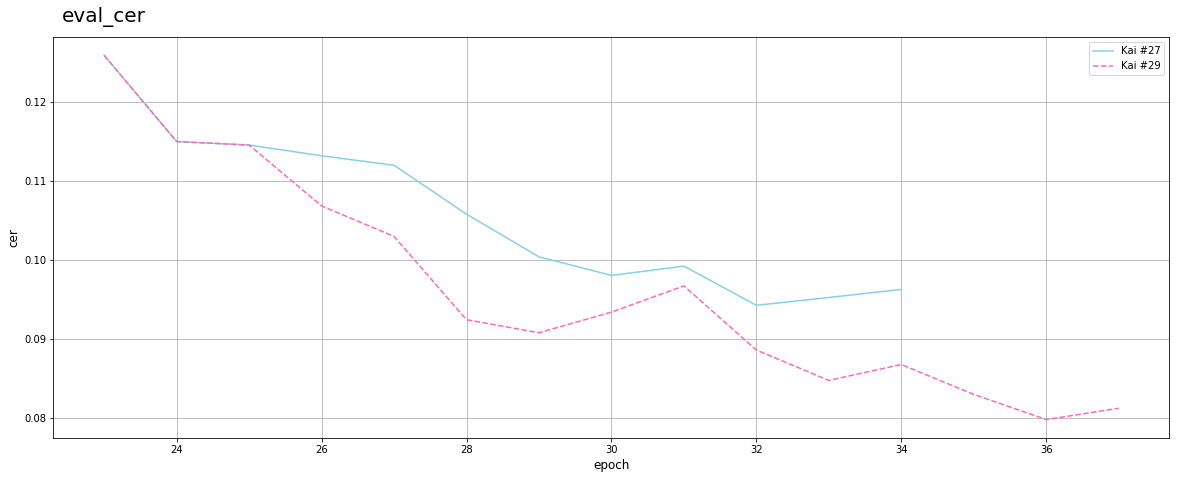

In [24]:
draw_add('scalar_eval_cer', [216,249])